## Final Project Submission

Please fill out:
* Author: Nobert Akwir Ogwel



## Project Overview

This project seeks to provide a classification model, based on SyriaTel Customer dataset, a tellecomunication company to predict whether a customer will ("soon") stop doing business with itself. We are interested in reducing how much money is lost because of customers who don't stick very long with the company.

---

## Business Understanding.

Churn rate, in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is most commonly exppressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. A high churn rate could adversely affect profits and impede growth.   

Churn rate is an important factor in the tellecommunications industry. The mobile Telecommunication industry is becoming more saturated, with more and more customers swapping their registered services between competing companies.The churn rate not only includes when customers switch carriers but also  includes when customers terminate service without switching. This measurement is most valuable in subscriber-based businesses in which subscription fees comprise most of the revenues.   

Therefore, companies like SyriaTel, have realized thet they should focus their marketing efforts on customer retention rather than customer acquisition. In fact, it is less profitable for providers to attract new customers than prevent current customers from quitting. Hence, providers are engaged more and more in building predictive models in order to identify which customers are most likely to leave or churn, so that they offer them promotions to persuade them to keep using their lines.   

Churn prediction is a management science problem for which a machine learning approach can be adopted. Based on Historical data, a model can be trained to classify customers as future chunners or non-chunners. Research shows that customer's behavioural features such as calls duration, calls count, refill/bill amount etc. , are good predictiors of churn.

---

## Data Understanding

### Importing the Data

In [1]:
import pandas as pd

data = pd.read_csv('syriatel.csv')

#previewing the first five rows of our data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
#Checking the general information about our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

> **From above information of our data, we have a total of 3333 entries, 21 columns. All our columns have no missing values. most of our colimns are of integer and float data types with few of them being of string datatypes**

In [3]:
#Checking for dupicate entries
data.duplicated().sum()

0

> **Therefore we do not have any duplicated entries in a our dataset**

In [4]:
#Checking for value_counts in our churn(dependent) variable
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
#Dropping features which we really think impact our target variable.
to_drop = ['state','account length','phone number']
for col in to_drop:
    data.drop(col, axis=1,inplace=True)

data.head()

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Checking our new dataset concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area code               3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [7]:
#Converting the datatype of the 'area code' variable from interger to object since it is a categorical variable.
data['area code'] = data['area code'].astype('object')

In [8]:
data['area code'].dtype

dtype('O')

---

### Defining our dependent and independent variables, and also instantiating the train_test_split.

**Defining X and y**

In [61]:
y = data['churn'].astype('int64')
X = data.drop('churn',axis=1)

Train_Test_Split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [64]:
#checking the shape of our split datasets.
splits = (X_train, X_test, y_train, y_test)
for split in splits:
    print(split.shape)
    print('----------------')

(2666, 17)
----------------
(667, 17)
----------------
(2666,)
----------------
(667,)
----------------


---

## Data Preparation

**Dealing with categorical data**  
Some of the columns of X_train currently contain categorical data (i.e. Dtype object).   
OneHotEncoder from scikit-learn can be used to convert categorical variables into dummy one-hot encoded variables:

In [65]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_features = ['area code','international plan','voice mail plan']
X_train_categorical = X_train[categorical_features].copy()
X_train_categorical.sample(10)

,area code,international plan,voice mail plan
681,415,no,no
1750,510,no,no
3241,415,yes,no
696,415,no,no
1405,510,no,no
1912,408,no,no
3170,415,no,no
1977,415,yes,no
1009,415,no,no
1802,415,no,yes


In [66]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=ohe.get_feature_names_out(input_features=X_train_categorical.columns)
)
X_train_ohe

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1095,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1130,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1294,1.0,0.0,0.0,1.0,0.0,1.0,0.0
860,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [67]:
#Creating our numerical features variable
numerical_features = []
for col in X_train.columns:
    if X_train[col].dtype != 'object':
        numerical_features.append(col)
print(numerical_features,'\n')
print(len(numerical_features))

['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'] 

14


In [68]:
#We drop the area code feature since it is a categorical variable.
X_train_numeric = X_train[numerical_features].copy()
X_train_numeric.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0


In [69]:
#Concatinating our encoded dataframe and the numeric dataframe
X_train_full = pd.concat([X_train_numeric,X_train_ohe],axis=1)
X_train_full.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,total intl calls,total intl charge,customer service calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,...,6,1.78,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,...,4,1.11,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,...,9,2.35,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,...,2,2.16,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,...,3,1.22,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [70]:
#Handling categorical variables in the test set
X_test_categorical = X_test[categorical_features].copy()
ohe.fit(X_test_categorical)
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_test_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=ohe.get_feature_names_out(input_features=X_test_categorical.columns)
)
X_test_ohe

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2674,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1345,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1957,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2148,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
2577,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2763,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3069,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1468,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [71]:
#Handling Numerical variables of the test set
X_test_numeric = X_test[numerical_features].copy()
X_test_numeric.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1


In [72]:
#Concatinating our numeric and categorical test dataframes
X_test_full = pd.concat([X_test_numeric,X_test_ohe],axis=1)
X_test_full.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,total intl calls,total intl charge,customer service calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,...,3,3.65,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2674,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,...,6,3.46,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1345,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,...,1,1.84,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1957,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,...,2,2.75,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2148,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,...,7,2.70,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0


___

### Fitting a base model on our data

In [73]:
#Importing the Logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_full,y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

#### Evaluation of the base Model

In [74]:
#Getting the predicted values of our test set.
y_hat_test = logreg.predict(X_test_full)

In [75]:
#Checking our Classification metrics.
#Importing the various metrics used o evaluate our classification model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

base_accuracy_score = accuracy_score(y_test,y_hat_test)
base_precision_score = precision_score(y_test,y_hat_test)
base_f1_score = f1_score(y_test,y_hat_test)
base_recall_score = recall_score(y_test,y_hat_test)

print(f'base_accuracy_score: {base_accuracy_score}')
print(f'base_precision_score: {base_precision_score}')
print(f'base_f1_score: {base_f1_score}')
print(f'base_recall_score: {base_recall_score}')

base_accuracy_score: 0.8545727136431784
base_precision_score: 0.5666666666666667
base_f1_score: 0.2595419847328244
base_recall_score: 0.16831683168316833


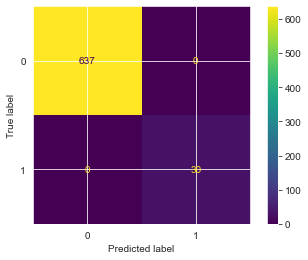

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_log, X_test_full, y_hat_test);

##### Plotting the roc curve

Base_Auc :0.8270650386593429


<function matplotlib.pyplot.show(close=None, block=None)>

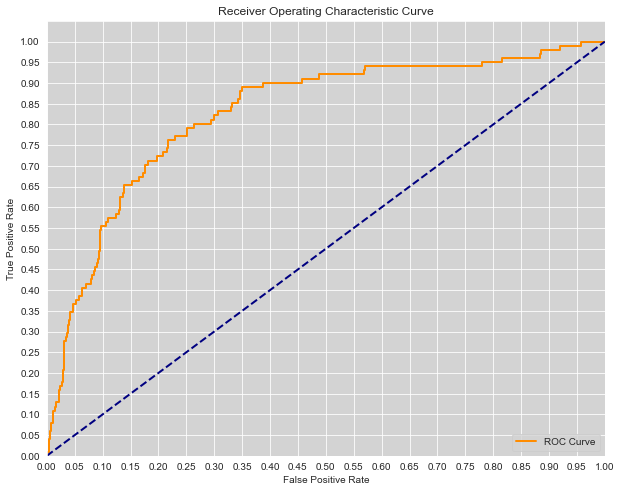

In [77]:
#Importing the roc_curve and Area under the curve methods.
from sklearn.metrics import roc_curve, auc

base_y_score = model_log.decision_function(X_test_full)
fpr, tpr, threshholds = roc_curve(y_test,base_y_score)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborn's beatiful stylling.
sns.set_style('darkgrid',{'axes.facecolor':'lightgrey'})

print(f'Base_Auc :{auc(fpr,tpr)}')
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label="ROC Curve")
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show

#### Normalization

Normalizing all numeric features in our X_train dataset to a consistent scale of 0 to 1 to avoid some features impacting the model more heavily than other.   
Using the MinMaxScaler from ScikitLearn with default parameterto create a maximum value of 1 and a minimum of value of 0.

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled.head()


,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,0.0,0.266801,0.459259,0.266892,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,0.330,0.315789,0.329630,0.222222
1373,0.0,0.314187,0.555556,0.314189,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,0.205,0.210526,0.205556,0.444444
679,0.0,0.631246,0.355556,0.631250,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,0.435,0.473684,0.435185,0.111111
56,0.0,0.356979,0.503704,0.356926,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,0.400,0.105263,0.400000,0.111111
1993,0.0,0.613728,0.488889,0.613682,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,0.225,0.157895,0.225926,0.000000


Concatenating our encoded categorical features and our scaled continous features.

In [47]:
X_train_scaled_full = pd.concat([X_train_scaled,X_train_ohe],axis=1)
X_train_scaled_full.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,total intl calls,total intl charge,customer service calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,0.0,0.266801,0.459259,0.266892,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,...,0.315789,0.329630,0.222222,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,0.0,0.314187,0.555556,0.314189,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,...,0.210526,0.205556,0.444444,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,0.0,0.631246,0.355556,0.631250,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,...,0.473684,0.435185,0.111111,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,0.0,0.356979,0.503704,0.356926,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,...,0.105263,0.400000,0.111111,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,0.0,0.613728,0.488889,0.613682,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,...,0.157895,0.225926,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [44]:
#Scaling our test dataset
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)
X_test_scaled.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,0.0,0.437679,0.466667,0.437669,0.908991,0.623529,0.909091,0.447015,0.633803,0.447101,0.675,0.157895,0.675926,0.111111
2674,0.0,0.305859,0.644444,0.305912,0.597745,0.729412,0.597865,0.444325,0.760563,0.444710,0.640,0.315789,0.640741,0.000000
1345,0.0,-0.007467,-0.222222,-0.007432,0.438823,0.764706,0.439016,0.387036,0.387324,0.387328,0.340,0.052632,0.340741,0.444444
1957,0.0,0.603676,0.362963,0.603716,0.561177,0.535294,0.561307,0.357719,0.563380,0.358039,0.510,0.105263,0.509259,0.111111
2148,0.0,0.406088,0.533333,0.406081,0.617817,0.429412,0.617923,0.550027,0.408451,0.550508,0.500,0.368421,0.500000,0.111111


In [48]:
#Concatenating our x_tes_scaled with the encoded variables.
X_test_scaled_full = pd.concat([X_test_scaled,X_test_ohe],axis=1)
X_test_scaled_full.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,total intl calls,total intl charge,customer service calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,0.0,0.437679,0.466667,0.437669,0.908991,0.623529,0.909091,0.447015,0.633803,0.447101,...,0.157895,0.675926,0.111111,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2674,0.0,0.305859,0.644444,0.305912,0.597745,0.729412,0.597865,0.444325,0.760563,0.444710,...,0.315789,0.640741,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1345,0.0,-0.007467,-0.222222,-0.007432,0.438823,0.764706,0.439016,0.387036,0.387324,0.387328,...,0.052632,0.340741,0.444444,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1957,0.0,0.603676,0.362963,0.603716,0.561177,0.535294,0.561307,0.357719,0.563380,0.358039,...,0.105263,0.509259,0.111111,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2148,0.0,0.406088,0.533333,0.406081,0.617817,0.429412,0.617923,0.550027,0.408451,0.550508,...,0.368421,0.500000,0.111111,1.0,0.0,0.0,1.0,0.0,1.0,0.0


___

### Fitting a model to our Normalized data.

In [49]:
norm_model_log = logreg.fit(X_train_scaled_full,y_train)
norm_model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

#### Evaluating our model

In [51]:
#Getting the predicted values of our test set.
y_hat_test_scaled = logreg.predict(X_test_scaled_full)

In [53]:
#Checking our Classification metrics.
norm_accuracy_score = accuracy_score(y_test,y_hat_test_scaled)
norm_precision_score = precision_score(y_test,y_hat_test_scaled)
norm_f1_score = f1_score(y_test,y_hat_test_scaled)
norm_recall_score = recall_score(y_test,y_hat_test_scaled)

print(f'base_accuracy_score: {norm_accuracy_score}')
print(f'base_precision_score: {norm_precision_score}')
print(f'base_f1_score: {norm_f1_score}')
print(f'base_recall_score: {norm_recall_score}')

base_accuracy_score: 0.8545727136431784
base_precision_score: 0.5666666666666667
base_f1_score: 0.2595419847328244
base_recall_score: 0.16831683168316833


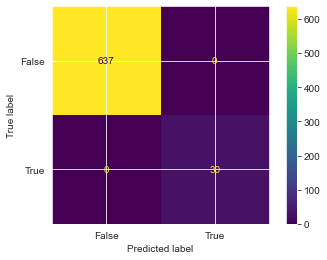

In [54]:
#Plotting a confusion matrix for our normalized datasets
ConfusionMatrixDisplay.from_estimator(norm_model_log, X_test_scaled_full, y_hat_test_scaled);

### Fitting a penalized model to our data(lasso).

In [58]:
lasso_log_reg = LogisticRegression(penalty='l1',fit_intercept=False,C=1e12,solver='liblinear')
lasso_model = lasso_log_reg.fit(X_train_scaled_full,y_train)
lasso_log_reg

LogisticRegression(C=1000000000000.0, fit_intercept=False, penalty='l1',
                   solver='liblinear')

In [59]:
#Predicted values for our penalized model
y_hat_lasso = lasso_log_reg.predict(X_test_scaled_full)

In [60]:
#Checking our Classification metrics.
lasso_accuracy_score = accuracy_score(y_test,y_hat_lasso)
lasso_precision_score = precision_score(y_test,y_hat_lasso)
lasso_f1_score = f1_score(y_test,y_hat_lasso)
lasso_recall_score = recall_score(y_test,y_hat_lasso)

print(f'lasso_accuracy_score: {lasso_accuracy_score}')
print(f'lasso_precision_score: {lasso_precision_score}')
print(f'lasso_f1_score: {lasso_f1_score}')
print(f'lasso_recall_score: {lasso_recall_score}')

lasso_accuracy_score: 0.8545727136431784
lasso_precision_score: 0.5666666666666667
lasso_f1_score: 0.2595419847328244
lasso_recall_score: 0.16831683168316833


In [78]:
print(lasso_model.coef_)

[[ 1.0962987   2.11933805 -0.01897771  2.09700223  1.10865498  0.26103934
   1.08210082  0.83662614 -0.16853545  0.20021043  1.15522222 -2.0812778
   0.71010421  4.57006177 -3.60331356 -3.61965894 -3.43661149 -2.15400775
  -0.06282409 -1.71153536 -3.28344745]]


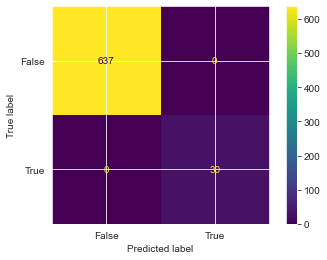

In [102]:
#Plotting a confusion matrix for our normalized datasets
ConfusionMatrixDisplay.from_estimator(lasso_model, X_test_scaled_full, y_hat_lasso);

Base_Auc :0.8286219081272086


<function matplotlib.pyplot.show(close=None, block=None)>

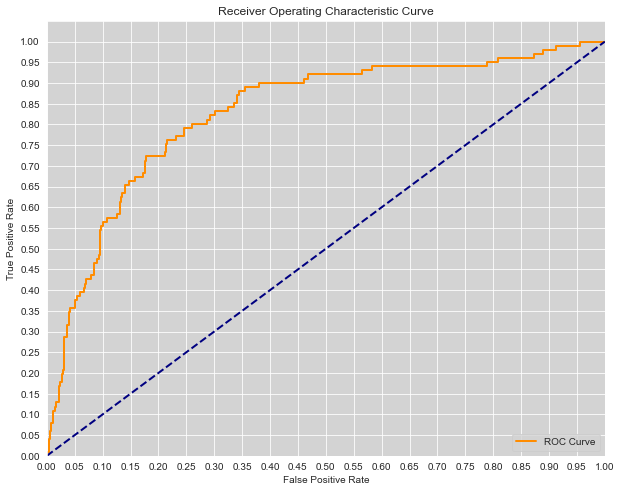

In [79]:
#Roc curve and Auc for our Lasso model
lasso_y_score = lasso_model.decision_function(X_test_scaled_full)
fpr, tpr, threshholds = roc_curve(y_test,lasso_y_score)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborn's beatiful stylling.
sns.set_style('darkgrid',{'axes.facecolor':'lightgrey'})

print(f'Base_Auc :{auc(fpr,tpr)}')
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label="ROC Curve")
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show

___

### Fitting a KNN clasifier model to our dataset.

In [85]:
#Importing the KNNClassifier and instantiating our model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model = classifier.fit(X_train_scaled_full, y_train)
knn_model

KNeighborsClassifier()

In [86]:
#Predicting our y values for the test set
y_knn_pred = classifier.predict(X_test_scaled_full)

In [87]:
#Checking our Classification metrics.
knn_accuracy_score = accuracy_score(y_test,y_knn_pred)
knn_precision_score = precision_score(y_test,y_knn_pred)
knn_f1_score = f1_score(y_test,y_knn_pred)
knn_recall_score = recall_score(y_test,y_knn_pred)

print(f'knn_accuracy_score: {knn_accuracy_score}')
print(f'knn_precision_score: {knn_precision_score}')
print(f'knn_f1_score: {knn_f1_score}')
print(f'knn_recall_score: {knn_recall_score}')

knn_accuracy_score: 0.8755622188905547
knn_precision_score: 0.7647058823529411
knn_f1_score: 0.3851851851851852
knn_recall_score: 0.25742574257425743


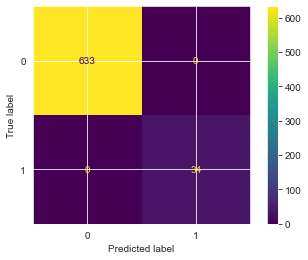

In [100]:
#Plotting a confusion matrix for our normalized datasets
ConfusionMatrixDisplay.from_estimator(classifier, X_test_scaled_full, y_knn_pred);

___

### Fitting a Gaussian Naive Bayes Model to our scaled dataset.

In [104]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gauss_model = GaussianNB()

# Train the model using the training sets
naive_model =gauss_model.fit(X_train_scaled_full,y_train)

#Predict Output
y_naive_pred= gauss_model.predict(X_test_scaled_full) # 0:Overcast, 2:Mild


#### Evaluating the Gaussian naive bayes Model

In [96]:
#Checking our Classification metrics.
naive_accuracy_score = accuracy_score(y_test,y_naive_pred)
naive_precision_score = precision_score(y_test,y_naive_pred)
naive_f1_score = f1_score(y_test,y_naive_pred)
naive_recall_score = recall_score(y_test,y_naive_pred)

print(f'naive_accuracy_score: {naive_accuracy_score}')
print(f'naive_precision_score: {naive_precision_score}')
print(f'naive_f1_score: {naive_f1_score}')
print(f'naive_recall_score: {naive_recall_score}')

naive_accuracy_score: 0.8440779610194903
naive_precision_score: 0.48148148148148145
naive_f1_score: 0.42857142857142855
naive_recall_score: 0.38613861386138615


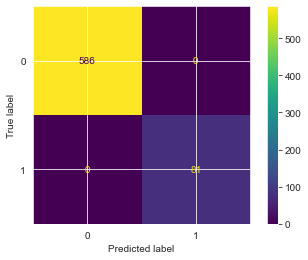

In [101]:
#Plotting a confusion matrix for our normalized datasets
ConfusionMatrixDisplay.from_estimator(gauss_model, X_test_scaled_full, y_naive_pred);